## Import Dependencies and set working directory

In [8]:
import json
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
%cd "C:\Users\lbrig\Documents\GRAD SCHOOL\Semester 3\Covid19 Kaggle\CORD-19-research-challenge"

C:\Users\lbrig\Documents\GRAD SCHOOL\Semester 3\Covid19 Kaggle\CORD-19-research-challenge


## For loop to extract relevant data from each json file

In [3]:
kaggle= []

start=datetime.now()

jsonpaths = ["biorxiv_medrxiv\\biorxiv_medrxiv", "comm_use_subset\\comm_use_subset", "custom_license\\custom_license", "noncomm_use_subset\\noncomm_use_subset"]
for path in jsonpaths:
    for file in os.listdir(path):
        filename = "%s\%s" % (path, file)
        with open(filename, 'r') as covidfile:
            df=json.load(covidfile)

        #Pull out columns needed
        #Paper ID number
        paperid = df['paper_id']
        #Title of paper
        title = df['metadata']['title']
        #Abstract of paper with each portion of text concatinated together
        abstract= ''
        for words in df['abstract']:
            abstract = abstract + ' ' + words['text']
        #Full document with each portion of text concatinated together
        fulldoc= ''
        for words in df['body_text']:
            fulldoc = fulldoc + ' ' + words['text']
        #File type 
        filetype= path.split('\\')
        
        #Append to kaggle 
        kaggle.append({'ID': paperid, 'Title': title, 'Abstract': abstract, 'Document': fulldoc, 'Filepath': filetype[0]})


kaggledf=pd.DataFrame(kaggle)

end=datetime.now()
print("Run time: ", end-start)


Run time:  0:10:10.064949


In [4]:
kaggledf.head(5)

,ID,Title,Abstract,Document,Filepath
0,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,word count: 194 22 Text word count: 5168 23 2...,"VP3, and VP0 (which is further processed to V...",biorxiv_medrxiv
1,00340eea543336d54adda18236424de6a5e91c9d,Analysis Title: Regaining perspective on SARS-...,"During the past three months, a new coronavir...","In December 2019, a novel coronavirus, SARS-C...",biorxiv_medrxiv
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,,The 2019-nCoV epidemic has spread across Chin...,biorxiv_medrxiv
3,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...",Infectious bronchitis (IB) causes significant...,"Infectious bronchitis (IB), which is caused b...",biorxiv_medrxiv
4,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,Nipah Virus (NiV) came into limelight recentl...,Nipah is an infectious negative-sense single-...,biorxiv_medrxiv


In [5]:
kaggledf.shape

(33375, 5)

In [6]:
#Replacing the cells with only white space with na
kaggledf = kaggledf.replace(r'^\s*$', np.nan, regex=True)

In [7]:
#Count of missing values per column
kaggledf.isna().sum()

ID             0
Title       3655
Abstract    8548
Document       0
Filepath       0
dtype: int64

In [8]:
#How many of each document type?
pd.value_counts(kaggledf.Filepath)


custom_license        20657
comm_use_subset        9315
noncomm_use_subset     2350
biorxiv_medrxiv        1053
Name: Filepath, dtype: int64

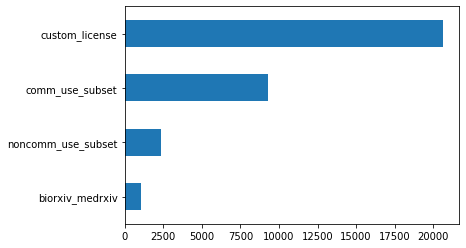

In [9]:
#Plot the count of each document type
kaggledf.Filepath.value_counts().sort_values().plot(kind = 'barh')

In [23]:
kaggledf.to_csv('KaggleData.csv')

# Looking at Metadata csv and merging with kaggledf

## ---SUMMARY FROM METADATA README----
##### total metadata rows: 45774
##### biorxiv_medrxiv: 1053 full text (new: 194, removed: 26)
##### comm_use_subset: 9315 full text (new: 210, removed: 13)
##### custom_license: 20657 full text (new: 4218, removed: 520)
##### noncomm_use_subset: 2350 full text (new: 6, removed: 9)

In [10]:
#New directory
%cd "C:\Users\lbrig\Documents\GRAD SCHOOL\Semester 3\Covid19 Kaggle"

C:\Users\lbrig\Documents\GRAD SCHOOL\Semester 3\Covid19 Kaggle


In [20]:
meta=pd.read_csv("metadata.csv")

In [21]:
meta.shape

(45774, 17)

In [22]:
meta.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389


In [13]:
#Split the IDs into multiple columns
m2= meta.sha.str.split(";", expand=True)

In [14]:
#Add a prefix to these columns 
m2=m2.add_prefix('ID_')

In [15]:
#Concat the ID columns and metadata
result = pd.concat([m2, meta], axis=1, sort=False)

In [16]:
result.shape

(45774, 12)

In [17]:
#Drop columns
result=result.drop(columns=['sha', 'ID_1', 'ID_2', 'ID_3', 'ID_4', 'ID_5'])

In [19]:
result.head()

,ID_0,title,abstract,authors,has_full_text,full_text_file
0,f056da9c64fbf00a4645ae326e8a4339d015d155,SIANN: Strain Identification by Alignment to N...,Next-generation sequencing is increasingly bei...,Samuel Minot; Stephen D Turner; Krista L Ternu...,True,biorxiv_medrxiv
1,daf32e013d325a6feb80e83d15aabc64a48fae33,Spatial epidemiology of networked metapopulati...,An emerging disease is one infectious epidemic...,Lin WANG; Xiang Li,True,biorxiv_medrxiv
2,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,Sequencing of the human IG light chain loci fr...,Germline variation at immunoglobulin gene (IG)...,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,True,biorxiv_medrxiv
3,4da8a87e614373d56070ed272487451266dce919,Bayesian mixture analysis for metagenomic comm...,Deep sequencing of clinical samples is now an ...,Sofia Morfopoulou; Vincent Plagnol,True,biorxiv_medrxiv
4,eccef80cfbe078235df22398f195d5db462d8000,Mapping a viral phylogeny onto outbreak trees ...,Developing methods to reconstruct transmission...,Stephen P Velsko; Jonathan E Allen,True,biorxiv_medrxiv


In [17]:
merged= result.merge(kaggledf, how= 'left', left_on='ID_0', right_on= 'ID')

In [18]:
merged.shape

(45774, 11)

In [19]:
merged.tail()

,ID_0,title,abstract,authors,has_full_text,full_text_file,ID,Title,Abstract,Document,Filepath
45769,289deae0b2050aa259a05ba84565a4df82fa099a,Personal Protective Equipment: Protecting Heal...,Abstract Purpose The recent Ebola epidemic tha...,"Fischer, William A.; Weber, David J.; Wohl, Da...",True,custom_license,289deae0b2050aa259a05ba84565a4df82fa099a,Personal Protective Equipment: Protecting Heal...,Purpose: The recent Ebola epidemic that devas...,The recent Ebola epidemic that devastated Wes...,custom_license
45770,21a4369f83891bf6975dd916c0aa495d5df8709e,Viruses and asthma,Abstract Background Viral respiratory infectio...,"Dulek, Daniel E.; Peebles, R. Stokes",True,custom_license,21a4369f83891bf6975dd916c0aa495d5df8709e,Viruses and asthma ☆,Background: Viral respiratory infection has l...,Asthma is a complex disease regulated by both...,custom_license
45771,NaN,Why the WHO won't use the p-word,"There are no criteria for a pandemic, but covi...","MacKenzie, Debora",False,custom_license,NaN,NaN,NaN,NaN,NaN
45772,NaN,"Communication, transparency key as Canada face...",NaN,"Glauser, Wendy",False,NaN,NaN,NaN,NaN,NaN,NaN
45773,3369a14e1d116943f48b3a33597796c9802de279,Searching for animal models and potential targ...,Emerging and re-emerging pathogens represent a...,"Vergara-Alert, Júlia; Vidal, Enric; Bensaid, A...",True,noncomm_use_subset,3369a14e1d116943f48b3a33597796c9802de279,Searching for animal models and potential targ...,Emerging and re-emerging pathogens represent ...,Searching for animal models and potential tar...,noncomm_use_subset


In [20]:
pd.value_counts(merged.has_full_text)

True     31753
False    14021
Name: has_full_text, dtype: int64

In [21]:
pd.value_counts(merged.full_text_file)

custom_license        23227
comm_use_subset        8982
noncomm_use_subset     2131
biorxiv_medrxiv        1218
Name: full_text_file, dtype: int64